In [1]:
# We will be working on Employee Data. 
# This is employee attrition data. The 'left' named column represents exit from the company or not.

# The data consists of categorical & number data. Thus, needs data preprocessing.
# Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column

In [3]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading data

In [9]:
#loading data


df = pd.read_csv('employee_exit.csv')

#sample view of data

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



# Data Preprocessing

In [11]:
df.info()

#insights : 
# There are no null values
# There are 10 total features
# There are two categorical features  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
#Checking for corelation of variables with target feature

df.corr().loc['left']

# insights:
# 'last_evaluation' this feature has least corelation to target variable
# 'satisfaction_level' this feature has high corelation withtarget variable

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

In [21]:
df.drop_duplicates()
df.shape

#There are no duplicate values

(14999, 10)

<AxesSubplot:xlabel='satisfaction_level'>

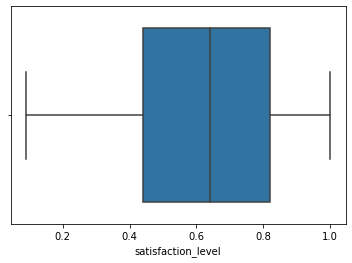

In [24]:
sns.boxplot(x = df['satisfaction_level'])


#There are no outliers

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

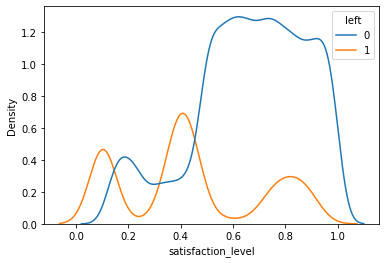

In [36]:
sns.kdeplot(x= df['satisfaction_level'], hue = df['left'])

#clearly we can see that employees with high satisfaction levels people didn't leave the company
# yet there is some uncertainity in people who left company

<AxesSubplot:xlabel='number_project', ylabel='Count'>

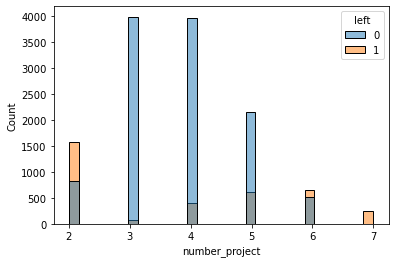

In [39]:
sns.histplot(x= df['number_project'], hue = df['left'])

# many people who didn't leave the company have number of projects ranged from 3-5 
# many employees with less projects about 2 have left company
# few employees with projects above 6 have left company

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

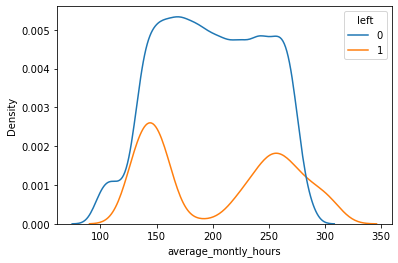

In [41]:
sns.kdeplot(x= df['average_montly_hours'], hue = df['left'])

#looks like both left and working employees have same average working hours 

<AxesSubplot:xlabel='salary', ylabel='count'>

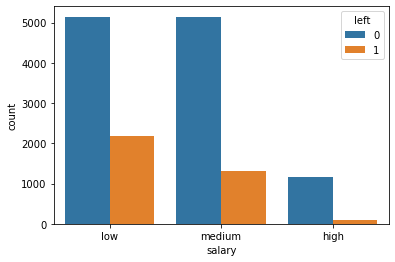

In [47]:
sns.countplot(x= df['salary'], hue = df['left'])

#It is clear that most of the left employees are paid with low and medium salaries

# Creating my Machine Learning Model

In [76]:
# Lets try Decision Tree algorithm

from sklearn.tree import DecisionTreeClassifier

# defining Target and explanatory variables

y= df['left']
X= df.drop('left', axis=1)
df['sales'],_ = pd.factorize(df['sales'])
df['salary'],_ = pd.factorize(df['salary'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [77]:
#Split data to check our model accuracy

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [87]:
#Choosing best fit for various number of lef nodes

nodes_list = [50, 100, 150, 200, 300, 500, 700]
for nodes in nodes_list:
    my_model = DecisionTreeClassifier(max_leaf_nodes = nodes, random_state = 0)
    my_model.fit(X_train, y_train)
    y_hat = my_model.predict(X_test)
    tn, fn, fp, tp = confusion_matrix(y_hat, y_test).ravel()
    error = (fn + fp)/(tn + fn + fp + tp)
    print( f'for nodes : {nodes} the error is {error}')
    
# at 200 my model gave least error

for nodes : 50 the error is 0.021
for nodes : 100 the error is 0.021666666666666667
for nodes : 150 the error is 0.02033333333333333
for nodes : 200 the error is 0.019
for nodes : 300 the error is 0.02266666666666667
for nodes : 500 the error is 0.02266666666666667
for nodes : 700 the error is 0.02266666666666667


In [90]:
#my final model and prediction

my_model = DecisionTreeClassifier(max_leaf_nodes = 200)
my_model.fit(X_train, y_train)

predictions = my_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.9803333333333333

In [89]:
#Yayyy.... ! we got 98% accurate results